In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os

#pd.set_option('float_format', '{:,.2f}'.format)
pd.set_option('display.precision', 4)
pd.set_option('display.max_rows', 10)
#pd.set_option('display.width', 180)


idx = pd.IndexSlice

In [2]:
# Load merged rec HDF store based on config

config_file = '/opt/data36/daliu/realtime/spykshrk/test/test_animal.config.json'
config = json.load(open(config_file, 'r'))

hdf_file = os.path.join(config['files']['output_dir'],
                        '{}.rec_merged.h5'.format(config['files']['prefix']))

store = pd.HDFStore(hdf_file, mode='r')


In [3]:
store

<class 'pandas.io.pytables.HDFStore'>
File path: /opt/data/daliu/realtime/spykshrk/test/test_animal.rec_merged.h5
/rec_1              frame        (shape->[719852,10])
/rec_10             frame        (shape->[108,4])    
/rec_100            frame        (shape->[2960950,8])
/rec_11             frame        (shape->[8,4])      
/rec_3              frame        (shape->[13899,454])
/rec_4              frame        (shape->[598,454])  

In [28]:
df

,rec_ind,timestamp,ntrode_id,thresh_crossed,lockout,custom_mean,custom_std,lfp_data,rd,current_val
0,1,73830243,5,False,False,12.769,8.034,-117.0,-2.8498,0.0000
1,4,73830243,17,False,False,10.619,6.506,91.0,2.2165,0.0000
2,1,73830243,11,False,False,13.067,8.143,102.0,2.4844,0.0000
3,1,73830243,12,False,False,10.125,6.396,81.0,1.9729,0.0000
4,1,73830243,13,False,False,10.767,6.809,125.0,3.0447,0.0000
...,...,...,...,...,...,...,...,...,...,...
719847,539848,75629982,12,False,False,10.125,6.396,-96.0,0.0712,3.0742
719848,539923,75629982,11,False,False,13.067,8.143,-123.0,-18.2150,18.7128
719849,539926,75629982,17,False,False,10.619,6.506,-195.0,16.6783,15.1201
719850,539923,75629982,5,False,False,12.769,8.034,11.0,-14.3753,13.2258


In [4]:
ripple_data = store['rec_1']
stim_lockout = store['rec_11']

In [22]:
stim_lockout_ranges = stim_lockout.pivot(index='lockout_num',columns='lockout_state', values='timestamp')
stim_lockout_ranges.reindex(columns=[1,0])

lockout_state,1,0
lockout_num,,
0,74648842,74656344
1,74759104,74766621
2,74830564,74838080
3,75126683,75134199


In [45]:
np.tile([[400],[400]], [1, len(stim_lockout_ranges)])

array([[400, 400, 400, 400],
       [400, 400, 400, 400]])

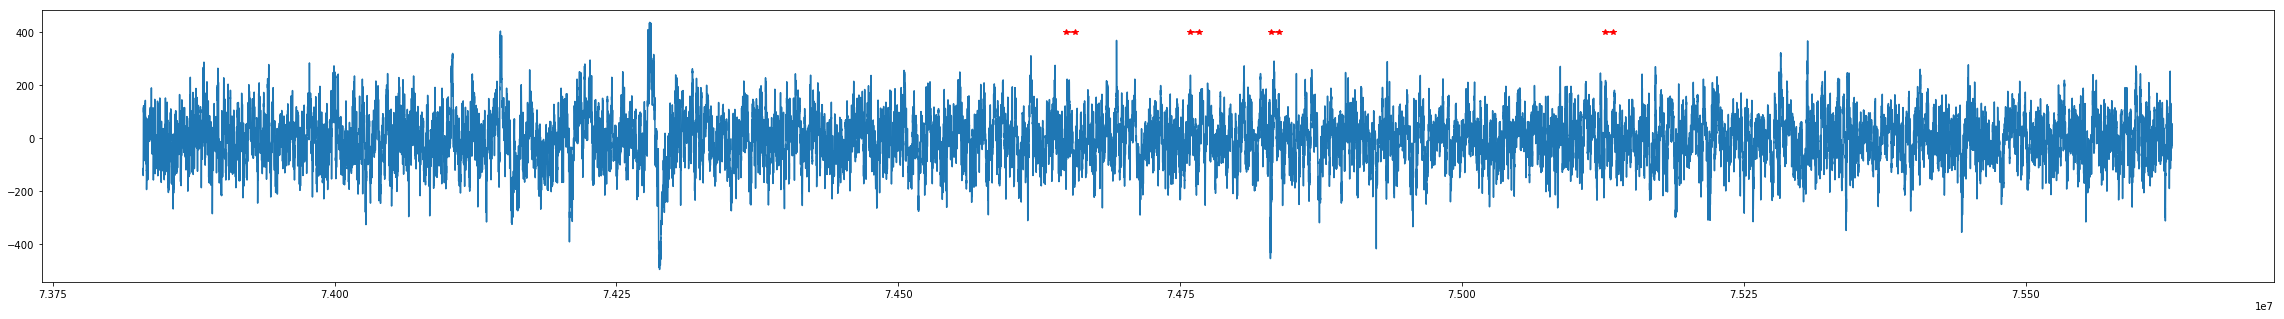

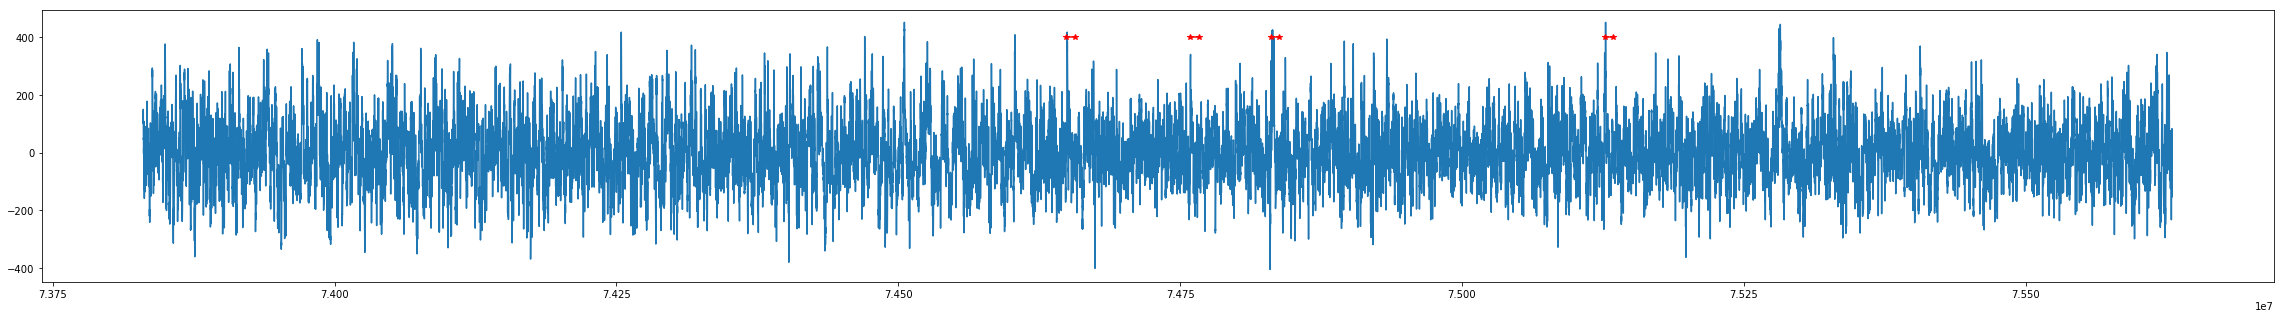

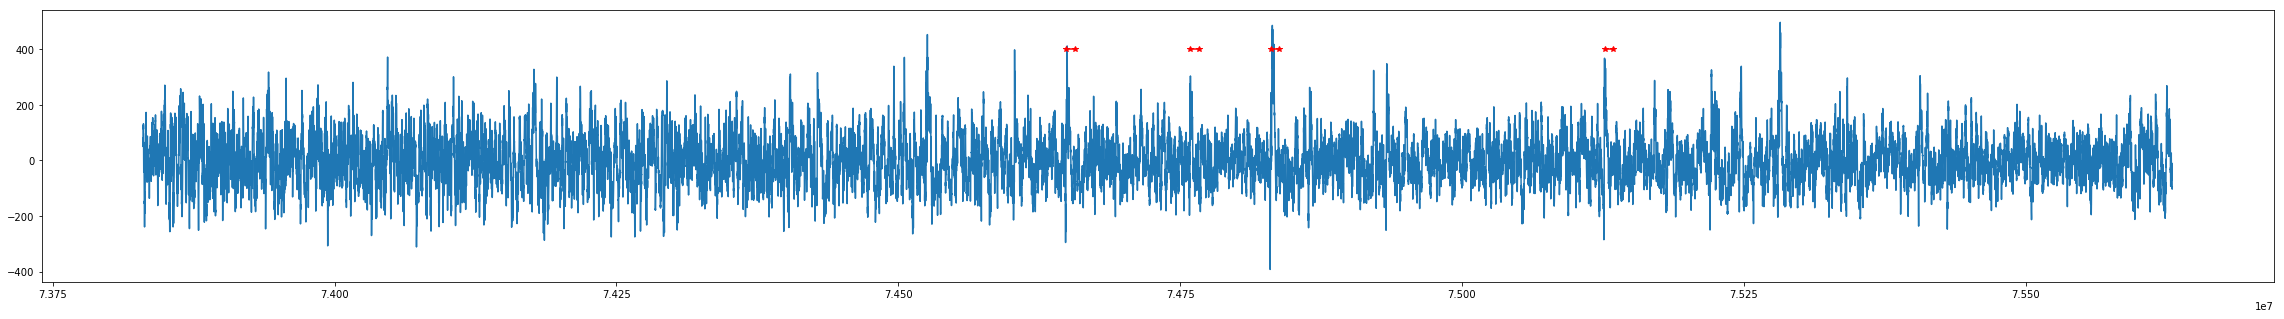

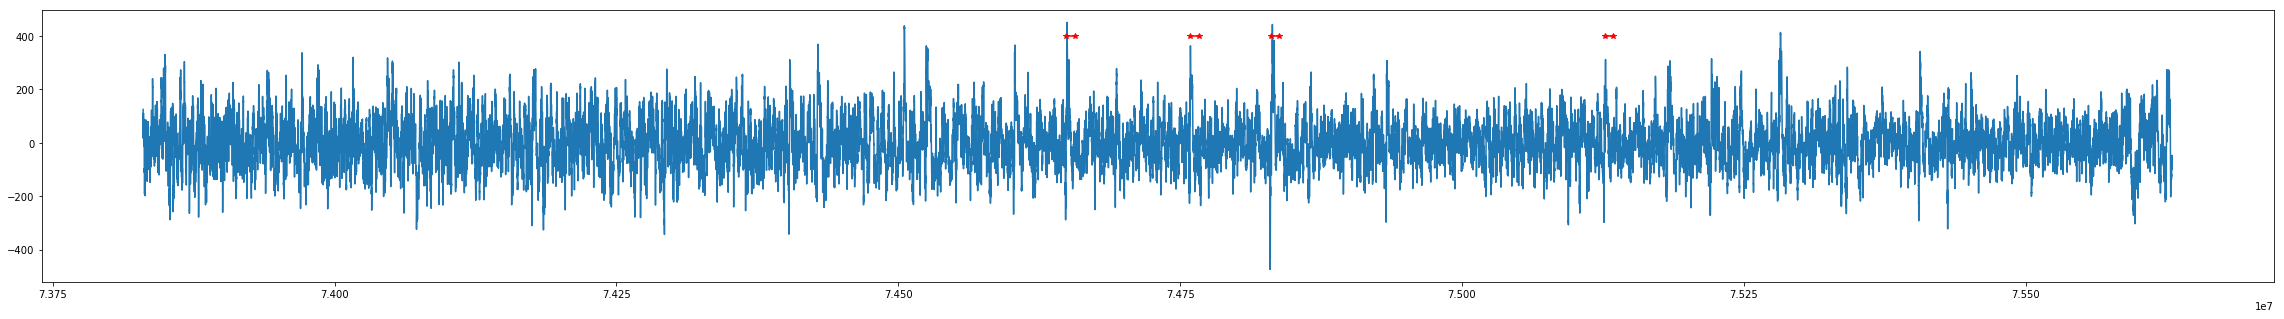

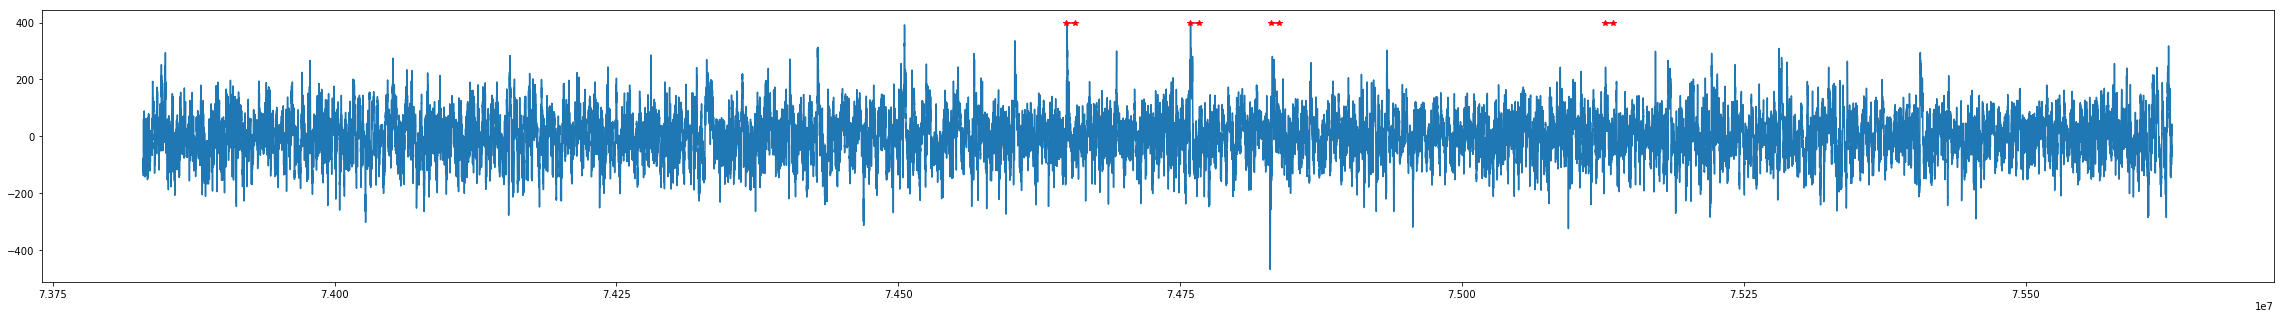

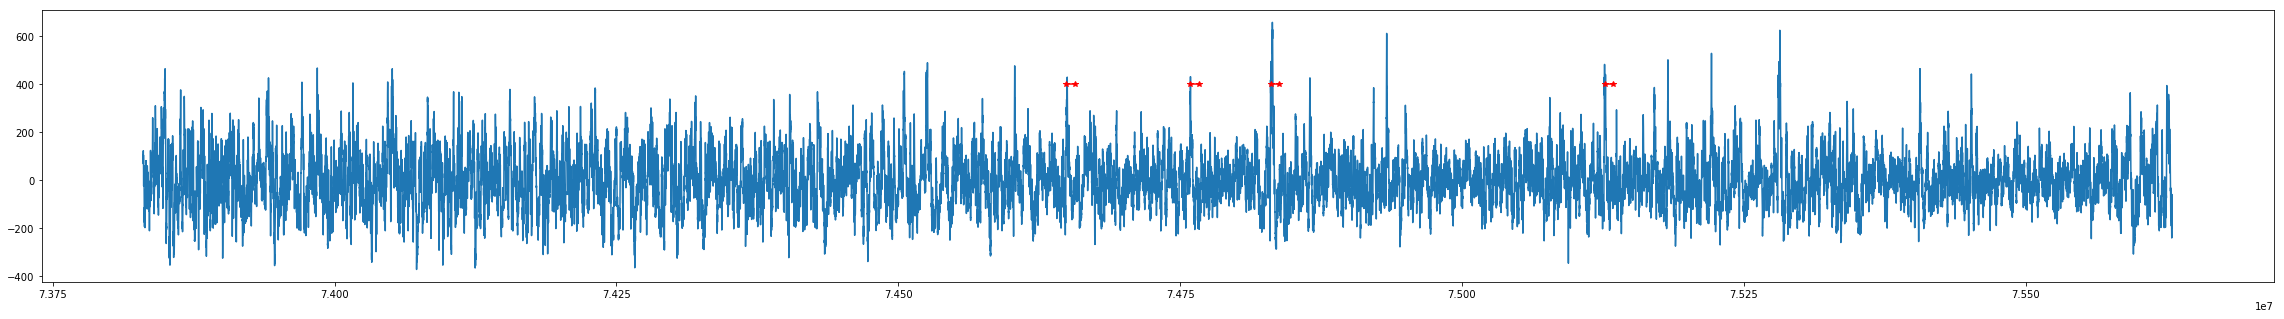

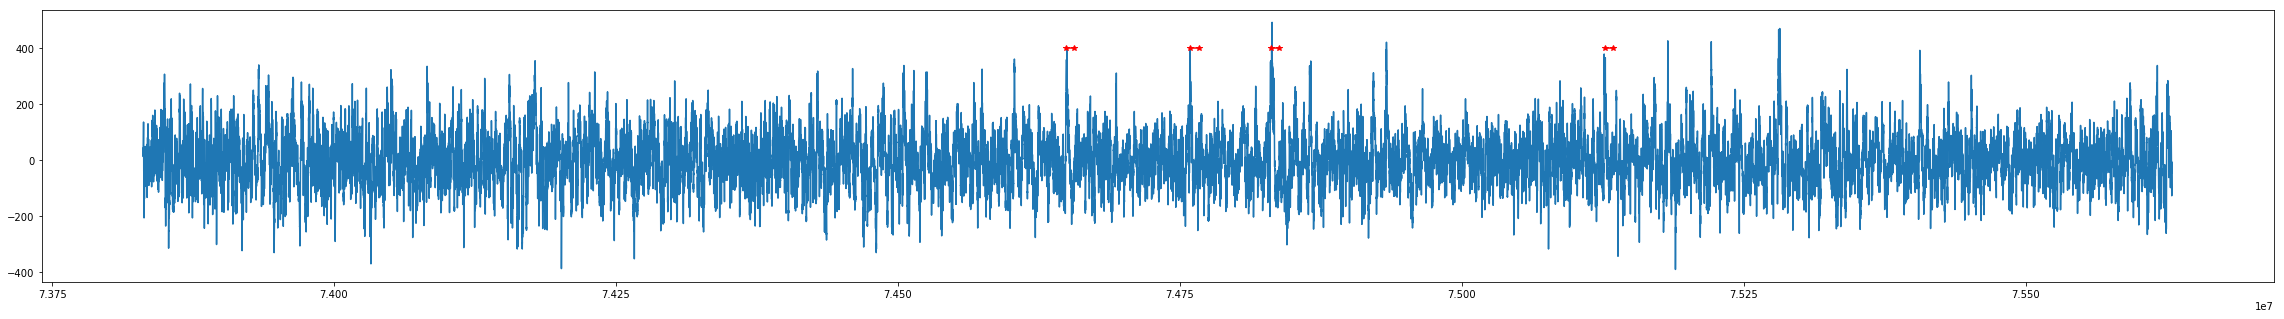

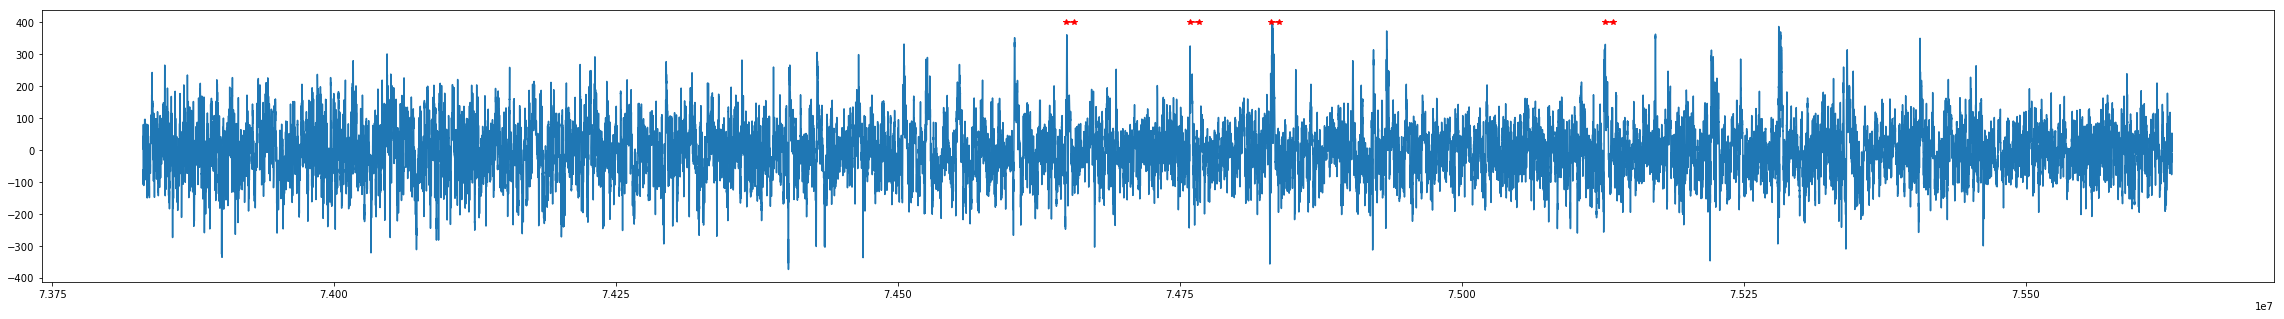

In [48]:
for group in ripple_data.groupby('ntrode_id'):
    plt.figure(figsize=[40,5])
    lfp_data = group[1]['lfp_data']
    timestamp = group[1]['timestamp']
    plt.plot(timestamp, lfp_data)
    plt.plot(stim_lockout_ranges.values.transpose(), np.tile([[400], [400]], [1, len(stim_lockout_ranges)]), 'r-*' )
plt.show()

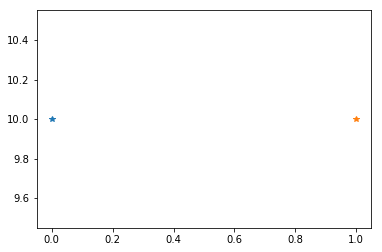

In [35]:
plt.plot([[0, 1]], [[10, 10]], '-*')
plt.show()

In [8]:
pd.set_option('display.max_rows', 10)

ripple_data

,rec_ind,timestamp,ntrode_id,thresh_crossed,lockout,custom_mean,custom_std,lfp_data,rd,current_val
0,1,73830243,5,False,False,12.769,8.034,-117.0,-2.8498,0.0000
1,4,73830243,17,False,False,10.619,6.506,91.0,2.2165,0.0000
2,1,73830243,11,False,False,13.067,8.143,102.0,2.4844,0.0000
3,1,73830243,12,False,False,10.125,6.396,81.0,1.9729,0.0000
4,1,73830243,13,False,False,10.767,6.809,125.0,3.0447,0.0000
...,...,...,...,...,...,...,...,...,...,...
719847,539848,75629982,12,False,False,10.125,6.396,-96.0,0.0712,3.0742
719848,539923,75629982,11,False,False,13.067,8.143,-123.0,-18.2150,18.7128
719849,539926,75629982,17,False,False,10.619,6.506,-195.0,16.6783,15.1201
719850,539923,75629982,5,False,False,12.769,8.034,11.0,-14.3753,13.2258
